<a href="https://colab.research.google.com/github/SumitraMukherjee/analytics/blob/master/SM_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit recognition

- We shall first train a ***Convolution Neural Network*** to recognize digits using labeled images of hand-written digits. 
- Then check how well the trained model can recognize our own hand-writing.  
- *Runtime* is set to *GPU* to speed up the training of the model.

## Import libraries

In [1]:
from tensorflow.keras.datasets.mnist import load_data # to load data
import numpy as np # for computations
import time # to record training and testing time
import matplotlib.pyplot as plt # for plotting

# import metrics to evaluate models
from sklearn.metrics import accuracy_score # accuracy

# import TensorFlow and keras for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

# for image processing
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL

## Get data

x_train : ndarray, Shape: (60000, 28, 28)
y_train : ndarray, Shape: (60000,)
x_test : ndarray, Shape: (10000, 28, 28)
y_test : ndarray, Shape: (10000,)

Number of labeled examples for:
	Training: 60,000
	Testing: 10,000
10 classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
Image: height = 28, width = 28
Number of input features = 28 x 28 = 784

Images (based on mean pixel values):


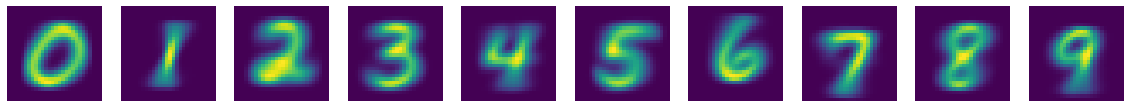

In [2]:
(x_train, y_train), (x_test, y_test) = load_data() # load data

a_names = ['x_train', 'y_train', 'x_test', 'y_test'] # array names
for name, a in zip(a_names, [x_train, y_train, x_test, y_test]):
    print(f"{name} : {a.__class__.__name__}, Shape: {a.shape}")

# display summary statistics for data
H, W = x_train.shape[1:] # height and width of image
nFeatures = H*W # number of input features
nTrain, nTest = len(y_train), len(y_test) # number of examples
classes = np.unique(y_train) # unique classes
nClasses = len(classes) # number of classes
print("\nNumber of labeled examples for:")
print(f"\tTraining: {nTrain:,}")
print(f"\tTesting: {nTest:,}" )
print(f"{nClasses} classes: {', '.join([str(d) for d in classes])}")
print(f"Image: height = {H}, width = {W}")
print(f"Number of input features = {H} x {W} = {H*W}")

print("\nImages (based on mean pixel values):") # show hand-written digits 
plt.figure(figsize=(20,10))
for i in range(10):
    avgImg = np.average(x_train[y_train==i],0)
    plt.subplot(1, 10, i+1)
    plt.imshow(avgImg.reshape((28,28))) 
    plt.axis('off')


# reshape data for CNN
x_train = x_train.reshape((nTrain, H, W, 1))
x_test = x_test.reshape((nTest, H, W, 1))

## Define Convolution Neural Network

In [3]:
def cnn4(K1, K2, K3, K4, n, 
         kernel_size = (3,3), 
         pool_size = (2,2),
         dropOutRate = 0.25, 
         nClasses = 10):
    """network with 4 convolution layers and a dense layer
    K1, K2, K3, K4: number of filters in the 4 convoluttion layers
    n: number of neurons in dense layer 
    """ 
    model = Sequential()

    # Covolution layers
    model.add(Conv2D(K1, kernel_size, activation='relu', 
                    input_shape=(H, W, 1)))
    model.add(Conv2D(K2, kernel_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size))
    model.add(Dropout(dropOutRate))

    model.add(Conv2D(K3, kernel_size, activation='relu')) 
    model.add(Conv2D(K4, kernel_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size))
    model.add(Dropout(dropOutRate))

    # Dense layer
    model.add(Flatten())
    model.add(Dense(n, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropOutRate))

    # Output layer
    model.add(Dense(nClasses, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', 
                metrics=['accuracy'])
    modelName = 'CNN4.' + '.'.join([str(v) for v in [K1, K2, K3, K4, n]])
    print("Model: ", modelName)
        
    return modelName, model

## Train and validate model

Model:  CNN4.16.32.64.128.512
Epoch 1/15
106/106 [==============================] - 6s 53ms/step - loss: 0.3454 - accuracy: 0.8932 - val_loss: 2.1264 - val_accuracy: 0.2473
Epoch 2/15
106/106 [==============================] - 5s 47ms/step - loss: 0.0931 - accuracy: 0.9707 - val_loss: 1.9234 - val_accuracy: 0.3815
Epoch 3/15
106/106 [==============================] - 5s 47ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.9837 - val_accuracy: 0.6417
Epoch 4/15
106/106 [==============================] - 5s 46ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.2375 - val_accuracy: 0.9388
Epoch 5/15
106/106 [==============================] - 5s 47ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0603 - val_accuracy: 0.9832
Epoch 6/15
106/106 [==============================] - 5s 46ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0320 - val_accuracy: 0.9910
Epoch 7/15
106/106 [==============================] - 5s 47ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss:

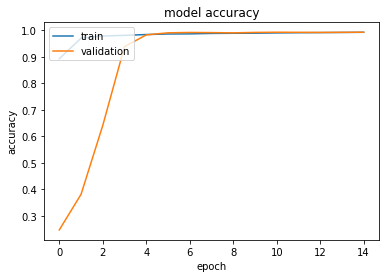


Time to predict test cases: 0.76 seconds

Accuracy on test data = 99.38


In [4]:
K1, K2, K3, K4, n = 16, 32, 64, 128, 512 # CNN parameters
epochs = 15 # number of training epochs
batch_size = 512 # batch_size for training 

modelName, model = cnn4(K1, K2, K3, K4, n) # create model
# train
st = time.time() # start time for training
history = model.fit(x_train/255.0, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=0.1,)
tTrain = time.time() - st # time to train model
print("\nTime to train classifier: %4.2f seconds\n" %(tTrain))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# test
st = time.time() # start time for prediction
predicted = model.predict(x_test/255.0).argmax(axis=1)
tTest = time.time() - st # time for prediction
print("\nTime to predict test cases: %4.2f seconds\n" %(tTest))
acc = accuracy_score(y_test, predicted) # accuracy
print("Accuracy on test data = %4.2f" %(100.0*acc))


## Functions to recognize new image

In [5]:
#from: https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Predict digit</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def predictImage(infile, model):
    img = PIL.Image.open(infile).resize((20,20))
    img = np.array(img).mean(axis=2)
    m = img.max()
    img = img*255/m
    a = np.zeros((28,28))
    a[4:4+20,4:4+20] = img
    x = np.array([a]).reshape((1,W,H,1))/255.0
    #p = model.predict(x).argmax(axis=1)[0]
    p = model.predict(x)
    d = p.argmax(axis=1)[0]
    plt.figure(figsize=(5,3))
    plt.bar(range(10),p[0])
    plt.title("Predicted digit: %d" %d, fontsize=30)
    plt.xlabel("digit", fontsize=20)
    plt.ylabel("probability", fontsize=20)
    plt.xticks(ticks=range(10), fontsize=16)
    plt.show()
    return 

def draw(filename='digit.png', w=200, h=200, line_width=10):
    print("Draw a digit in the box below and click the 'Predict digit' button")
    display(HTML(canvas_html % (w, h, line_width)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return predictImage(filename, model)

## Test your handwriting

Draw a digit in the box below and click the 'Predict digit' button


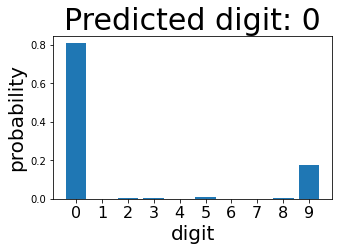

In [7]:
# Run this cell to predict your handwritten digits
# predicts the most likely digit
draw()